# Data science Challenge

## Customer Churn Analysis

**Client:** Video Streaming Company (VSC)

**Problem statement:** The VSC wants to know the likelihood of customer churn on their platforms.

**Solution:** Building a model will help VSC solve this problem and keep them proactively involved in retaining their customers.

In [1]:
# Importing pandas package and data dictionary
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [2]:
# Importing required packages

# Data packages
import numpy as np

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning / Classification packages
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier, plot_importance

import pickle

pd.set_option('display.max_columns', None)

In [3]:
# Displaying the train dataframe and shape
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
# Description of the numerical data
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


### EDA

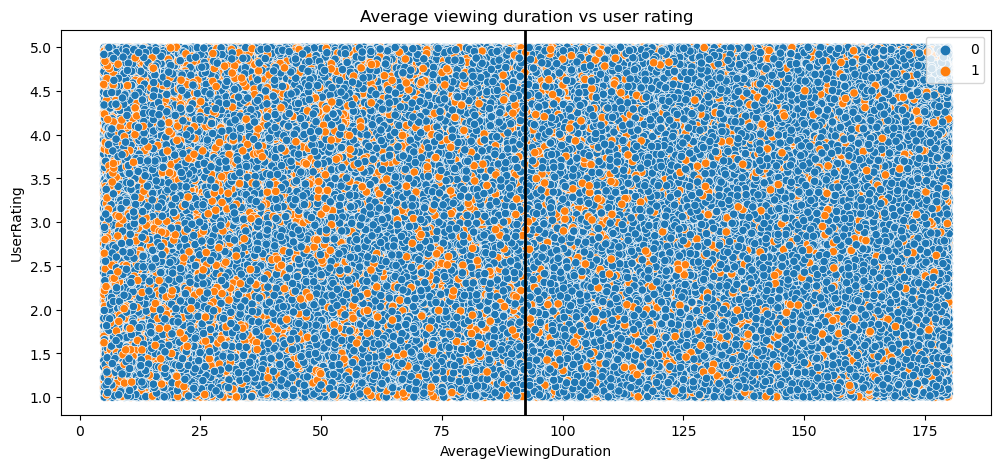

In [5]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=train_df, x='AverageViewingDuration', y='UserRating', hue='Churn')
plt.axvline(train_df['AverageViewingDuration'].mean(), color='black', lw=2)
plt.legend(loc='upper right')
plt.title('Average viewing duration vs user rating');

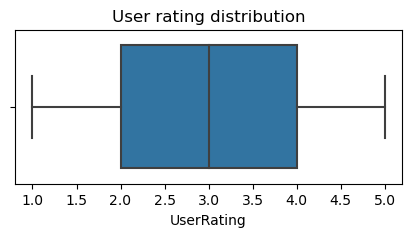

In [6]:
plt.figure(figsize=(5,2))
sns.boxplot(x=train_df['UserRating'])
plt.title('User rating distribution');

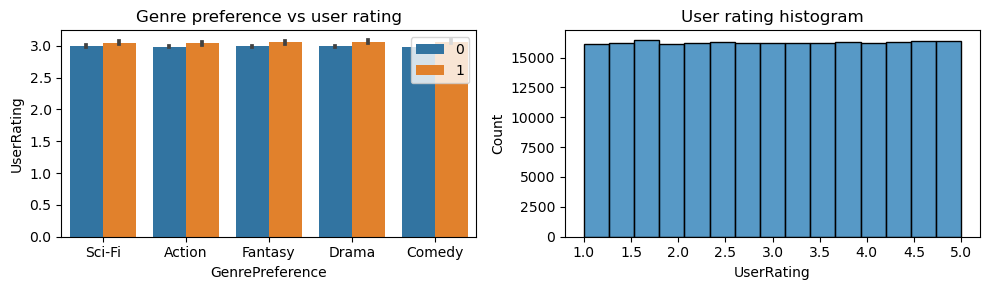

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.barplot(train_df, x='GenrePreference', y='UserRating', hue='Churn', ax=ax[0])
ax[0].legend(loc='upper right')
ax[0].set_title('Genre preference vs user rating')

sns.histplot(train_df, x='UserRating', bins=15, ax=ax[1])
ax[1].set_title('User rating histogram')
plt.tight_layout();

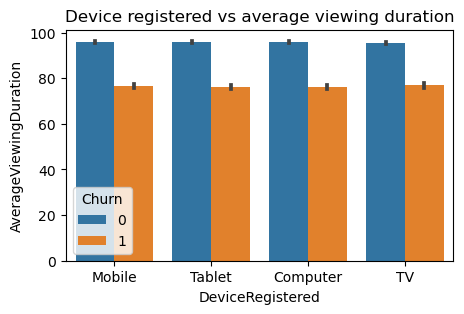

In [8]:
plt.figure(figsize=(5,3))
sns.barplot(train_df, x='DeviceRegistered', y='AverageViewingDuration', hue='Churn')
plt.title('Device registered vs average viewing duration');

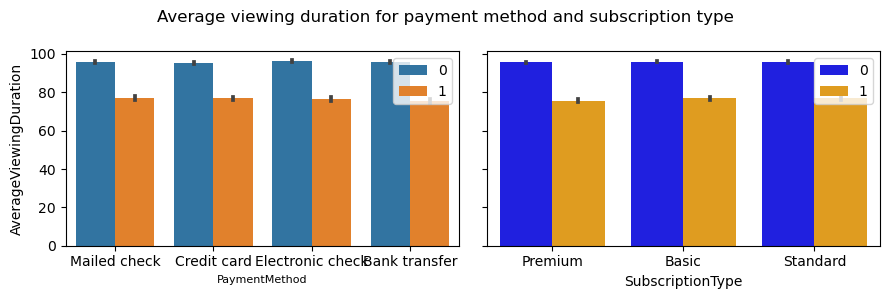

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9,3))
fig.suptitle('Average viewing duration for payment method and subscription type')

sns.barplot(train_df, x='PaymentMethod', y='AverageViewingDuration', hue='Churn', ax=ax[0])
ax[0].legend(loc='upper right')
ax[0].set_xlabel('PaymentMethod', fontsize=8)

sns.barplot(train_df, x='SubscriptionType', y='AverageViewingDuration',
            hue='Churn', palette=['blue', 'orange'], ax=ax[1])
ax[1].legend(loc='upper right')
ax[1].set(ylabel=None)
plt.tight_layout();

#### Insights
1. Customer with less viewing time tend to churn more
2. This data does not reprresent a real world scenario due to it similarity in ratio between values both categorical and nemerical.

### Preprocessing

In [10]:
# Coverting categorical data to numerical data
train_df = pd.get_dummies(train_df, columns=['PaymentMethod', 'ContentType', 
                                             'DeviceRegistered', 'GenrePreference']) 

train_df = pd.get_dummies(train_df, columns=['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl',
                                              'Gender', 'SubtitlesEnabled'], drop_first=True)

train_df['SubscriptionType'] = (train_df['SubscriptionType'].astype('category').cat.set_categories(
    ['Basic', 'Standard', 'Premium']).cat.codes)

train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,Churn,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Both,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,PaperlessBilling_Yes,MultiDeviceAccess_Yes,ParentalControl_Yes,Gender_Male,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,2,36.758104,63.531377,10,2.176498,4,3,CB6SXPNVZA,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,57,5.175208,294.986882,0,32.450568,25.725595,18,3.478632,8,23,S7R2G87O09,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1
2,73,12.106657,883.785952,0,7.395160,57.364061,23,4.238824,6,1,EASDC20BDT,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1
3,32,7.263743,232.439774,0,27.960389,131.537507,30,4.276013,2,24,NPF69NT69N,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1
4,57,16.953078,966.325422,2,20.083397,45.356653,20,3.616170,4,0,4LGYPK7VOL,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [11]:
# Showing class balance of target feature
train_df['Churn'].value_counts(normalize=True)

0    0.818768
1    0.181232
Name: Churn, dtype: float64

In [12]:
# Seperating predictive features from target feature
X = train_df.drop(['CustomerID', 'Churn'], axis=1)
y = train_df['Churn']

In [13]:
# Splitting the training data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

## Building Models - Finding Champion Model
**Model evaluation:** ROC AUC Score

### Logistic Regression Model

In [14]:
%%time
# Classifier
clf = LogisticRegression(solver='liblinear', random_state=0)

# Fitting training data to classifier
clf.fit(Xtrain, ytrain)

CPU times: total: 7.16 s
Wall time: 7.82 s


LogisticRegression(random_state=0, solver='liblinear')

In [15]:
# Predicting the probability of user churn on testing data
y_pred = clf.predict_proba(Xtest)[::,1]
y_pred

array([0.38558579, 0.43340472, 0.09899059, ..., 0.02218663, 0.17727168,
       0.09130776])

In [16]:
# Plot valves
# fpr = false positive rate
# tpr = true positive rate
fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)

In [17]:
# Computing the ROC AUC score 
roc_auc = roc_auc_score(ytest, y_pred) 
roc_auc

0.751274144206942

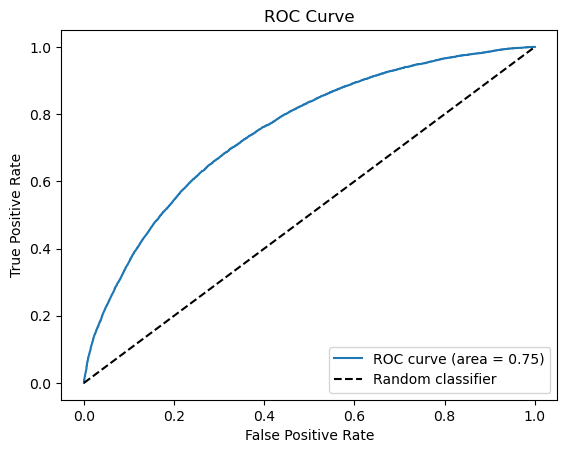

In [18]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show();

In [19]:
# Printing scores of the model
print('AUC:', roc_auc_score(ytest, y_pred))
print('precision:', precision_score(ytest, y_pred.round()))
print('recall:', recall_score(ytest, y_pred.round()))
print('f1_score:', f1_score(ytest, y_pred.round()))
print('accuracy:', accuracy_score(ytest, y_pred.round()))

AUC: 0.751274144206942
precision: 0.5889034512887724
recall: 0.12203512583740721
f1_score: 0.20217472815898013
accuracy: 0.8254384957422023


### Decision Tree Model

In [20]:
# Hyperparameter tuning of model
dt = DecisionTreeClassifier(random_state=0)

params = {'max_depth':[5, 10],
          'min_samples_leaf': [1, 2],
           'min_samples_split': [2, 3, 5]
          }

scoring = {'roc_auc', 'accuracy', 'precision', 'recall', 'f1'}

dt_cv = GridSearchCV(dt, params, scoring=scoring, refit='roc_auc', cv=5)

In [21]:
%%time
'''model built time = 6mins 22s'''
dt_cv.fit(Xtrain, ytrain)

CPU times: total: 6min 3s
Wall time: 6min 22s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 5]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'precision', 'accuracy', 'recall'})

In [22]:
# Saving the model
pickle.dump(dt_cv, open('dt_cv.pickle', 'wb'))

In [21]:
# Loading the model
dt_cv = pickle.load(open('dt_cv.pickle', 'rb'))

In [22]:
# Getting best parameters
dt_cv.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=3, random_state=0)

In [23]:
# Displaying best roc auc score
dt_cv.best_score_

0.7058266680212896

In [24]:
# Optimizing model with best parameters
dt_opt = DecisionTreeClassifier(max_depth=10, min_samples_split=3, random_state=0)

In [25]:
%%time
'''model built time = 13.1s'''
dt_opt.fit(Xtrain, ytrain)

CPU times: total: 8.69 s
Wall time: 13.1 s


DecisionTreeClassifier(max_depth=10, min_samples_split=3, random_state=0)

In [26]:
# Predicting the probability of user churn on testing data
dt_pred = dt_opt.predict_proba(Xtest)[:, 1]
dt_pred

array([0.41520468, 0.31103679, 0.0351295 , ..., 0.02719407, 0.36178862,
       0.11079944])

In [27]:
# Plot valves
# fpr = false positive rate
# tpr = true positive rate
fpr, tpr, thresholds = roc_curve(ytest, dt_pred, pos_label=1)

In [28]:
# Computing the ROC AUC score 
roc_auc = roc_auc_score(ytest, dt_pred) 
roc_auc

0.7131324712410928

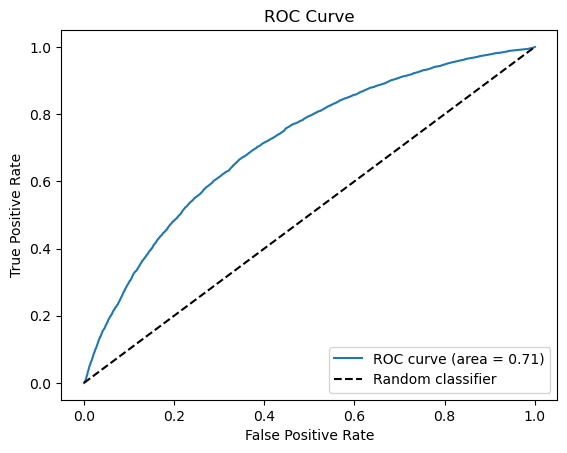

In [29]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show();

In [30]:
# Printing scores of the model
print('AUC:', roc_auc_score(ytest, dt_pred))
print('precision:', precision_score(ytest, dt_pred.round()))
print('recall:', recall_score(ytest, dt_pred.round()))
print('f1_score:', f1_score(ytest, dt_pred.round()))
print('accuracy:', accuracy_score(ytest, dt_pred.round()))

AUC: 0.7131324712410928
precision: 0.4638146167557932
recall: 0.11778019192467862
f1_score: 0.1878564724568623
accuracy: 0.8154297996620015


### Random Forest model

In [31]:
# Hyperparameter tuning of model
rf = RandomForestClassifier(random_state=0)

params = {'n_estimators': [300, 500],
          'max_depth':[10, 50],
          'min_samples_leaf': [1],
           'min_samples_split': [2],
          'max_samples': [1.0],
          'max_features': ['sqrt']
          }

scoring = {'roc_auc', 'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, params, scoring=scoring, refit='roc_auc', cv=4,
                     n_jobs=1, verbose=1)

In [34]:
%%time
'''model built time = 3h 24mins 37s'''
rf_cv.fit(Xtrain, ytrain)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
CPU times: total: 2h 46min 37s
Wall time: 3h 24min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [1.0], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'precision', 'accuracy', 'recall'},
             verbose=1)

In [35]:
# Saving the model
pickle.dump(rf_cv, open('rf_cv.pickle', 'wb'))

In [32]:
# Loading the model
rf_cv = pickle.load(open('rf_cv.pickle', 'rb'))

In [33]:
# Getting best parameters
rf_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_samples=1.0, n_estimators=500,
                       random_state=0)

In [34]:
# Displaying best roc auc score
rf_cv.best_score_

0.7408820023226649

In [36]:
# Optimizing model with best parameters
rf_opt = RandomForestClassifier(max_depth=10, max_samples=1.0, n_estimators=500, random_state=0)

In [58]:
%%time
'''model built time = 16mins 9s'''
rf_opt.fit(Xtrain, ytrain)

CPU times: total: 13min 9s
Wall time: 16min 4s


RandomForestClassifier(max_depth=10, max_samples=1.0, n_estimators=500,
                       random_state=0)

In [62]:
# Saving the model
pickle.dump(rf_opt, open('rf_opt.pickle', 'wb'))

In [37]:
# Loading the model
rf_opt = pickle.load(open('rf_opt.pickle', 'rb'))

In [38]:
# Predicting the probability of user churn on testing data
rf_pred = rf_opt.predict_proba(Xtest)[:, 1]
rf_pred

array([0.3360666 , 0.26811607, 0.10525211, ..., 0.04788578, 0.22042283,
       0.11299597])

In [39]:
# Plot valves
# fpr = false positive rate
# tpr = true positive rate
fpr, tpr, thresholds = roc_curve(ytest, rf_pred, pos_label=1)

In [40]:
# Computing the ROC AUC score 
roc_auc = roc_auc_score(ytest, rf_pred) 
roc_auc

0.7437528987097514

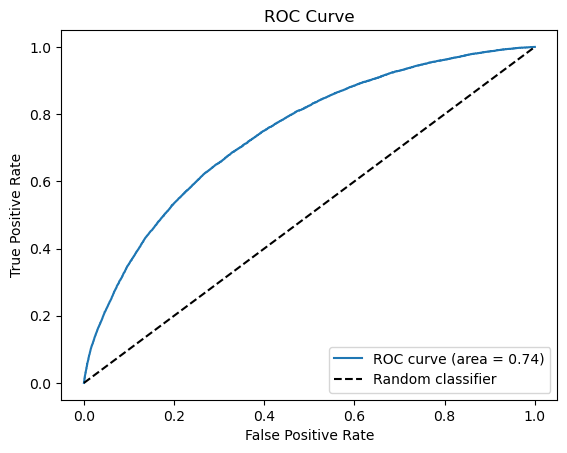

In [41]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show();

In [42]:
# Printing scores of the model
print('AUC:', roc_auc_score(ytest, rf_pred))
print('precision:', precision_score(ytest, rf_pred.round()))
print('recall:', recall_score(ytest, rf_pred.round()))
print('f1_score:', f1_score(ytest, rf_pred.round()))
print('accuracy:', accuracy_score(ytest, rf_pred.round()))

AUC: 0.7437528987097514
precision: 0.692
recall: 0.015661778019192468
f1_score: 0.03063031161473088
accuracy: 0.820335701511149


### XGBoost model

In [43]:
# Hyperparameter tuning of model
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

params= {'n_estimators': [5, 10],
          'max_depth':[4, 6],
          'min_child_weight': [3,5],
           'learning_rate': [0.3, 0.4],
          'subsample': [0.8],
          'colsample_bytree': [0.8]
        }

scoring = {'roc_auc', 'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, params, scoring=scoring, refit='roc_auc', cv=4)

In [65]:
%%time
'''model built time = 6mins 10s'''
xgb_cv.fit(Xtrain, ytrain)

CPU times: total: 9min 53s
Wall time: 6min 10s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.3, 0.4],
                         'max_depth': [4, 6], 'min_child_weight': [3, 5],
                         'n_estimators': [5, 10], 'subsample': [0.8]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'precision', 'accuracy', 'recall'})

In [66]:
# Saving the model
pickle.dump(xgb_cv, open('xgb_cv.pickle', 'wb'))

In [44]:
# Loading the model
xgb_cv = pickle.load(open('xgb_cv.pickle', 'rb'))

In [45]:
# Getting best parameters
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [46]:
# Displaying best roc auc score
xgb_cv.best_score_

0.7392400494226199

In [47]:
# Optimizing model with best parameters
xgb_opt = XGBClassifier(objective='binary:logistic',n_estimators= 10, 
                        max_depth= 6, min_child_weight=5, learning_rate=0.4, 
                        subsample=0.8, colsample_bytree=0.8, random_state=0)

In [48]:
%%time
'''model built time = 11.7s'''
xgb_opt.fit(Xtrain, ytrain)

CPU times: total: 18.4 s
Wall time: 11.7 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [49]:
# Predicting the probability of user churn on testing data
xgb_pred = xgb_opt.predict_proba(Xtest)[:, 1]
xgb_pred

array([0.37100038, 0.29588288, 0.13699318, ..., 0.0356022 , 0.20223235,
       0.10680121], dtype=float32)

In [50]:
# Plot valves
# fpr = false positive rate
# tpr = true positive rate
fpr, tpr, thresholds = roc_curve(ytest, xgb_pred, pos_label=1)

In [51]:
# Computing the ROC AUC score 
roc_auc = roc_auc_score(ytest, xgb_pred) 
roc_auc

0.7431132599635817

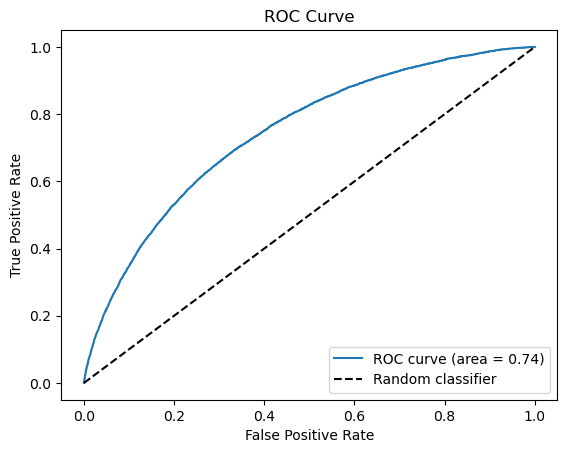

In [52]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show();

In [53]:
# Printing scores of the model
print('AUC:', roc_auc_score(ytest, xgb_pred))
print('precision:', precision_score(ytest, xgb_pred.round()))
print('recall:', recall_score(ytest, xgb_pred.round()))
print('f1_score:', f1_score(ytest, xgb_pred.round()))
print('accuracy:', accuracy_score(ytest, xgb_pred.round()))

AUC: 0.7431132599635817
precision: 0.5806037251123957
recall: 0.08183957993843925
f1_score: 0.14345790684757598
accuracy: 0.8228788947774296


## Predicting on Test set with Champion Model
### Champion model : Logistic Regression model

In [54]:
# Displaying the test dataframe and shape
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [55]:
# Checking for missing data
test_df.isna().any().any()

False

In [56]:
# Partitioning customerID based on project requirement
customerID = test_df[['CustomerID']]

### Preprocessing

In [57]:
# Coverting categorical data to numerical data
test_df = pd.get_dummies(test_df, columns=['PaymentMethod', 'ContentType',
                                            'DeviceRegistered', 'GenrePreference']) 

test_df = pd.get_dummies(test_df, columns=['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl',
                                              'Gender', 'SubtitlesEnabled'], drop_first=True)

test_df['SubscriptionType'] = (test_df['SubscriptionType'].astype('category').cat.set_categories(
    ['Basic', 'Standard', 'Premium']).cat.codes)

# Dropping non-predictive feature
test_df = test_df.drop(['CustomerID'], axis=1)

# Displaying test data
test_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Both,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,PaperlessBilling_Yes,MultiDeviceAccess_Yes,ParentalControl_Yes,Gender_Male,SubtitlesEnabled_Yes
0,38,17.869374,679.036195,2,29.126308,122.274031,42,3.522724,2,23,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,77,9.912854,763.289768,0,36.873729,57.093319,43,2.021545,2,22,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,5,15.019011,75.095057,1,7.601729,140.414001,14,4.806126,2,22,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3,88,15.357406,1351.451692,1,35.586430,177.002419,14,4.943900,0,23,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1
4,91,12.406033,1128.949004,1,23.503651,70.308376,6,2.846880,6,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0


In [58]:
# Using best model to predict likelihood on test data and assigning to an array object
predicted_probability = clf.predict_proba(test_df)[:, 1]
predicted_probability

array([0.10712637, 0.04270462, 0.39586832, ..., 0.10734986, 0.26652521,
       0.01870497])

In [59]:
# Converting result in array to dataframe  
predicted_probability = pd.DataFrame(predicted_probability, columns=['predicted_probability'])

# Merging customerID and predicted probablity dataframe
prediction = pd.concat([customerID, predicted_probability], axis=1)

In [60]:
# Dataframe showing customer likelihood to churn
prediction.head(10)

,CustomerID,predicted_probability
0,O1W6BHP6RM,0.107126
1,LFR4X92X8H,0.042705
2,QM5GBIYODA,0.395868
3,D9RXTK2K9F,0.044956
4,ENTCCHR1LR,0.131654
5,7A88BB5IO6,0.465350
6,70OMW9XEWR,0.116973
7,EL1RMFMPYL,0.290717
8,4IA2QPT6ZK,0.200447
9,AEDCWHSJDN,0.175055


In [61]:
# Saving prediction result as csv file 
prediction.to_csv('prediction.csv')

##### Thank you